# ONE SAMPLE Z TEST

In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats import weightstats
import scipy

In [2]:
sampledata = pd.read_csv('C:\\Users\\bhara\\Python\\Piece_Dim1.csv')   # importing sample data

In [3]:
sampledata.head(3)

,Item_No,Length,Width,Height,Operator
0,Item-1,102.67,49.53,19.69,Op-1
1,Item-2,102.50,51.42,19.63,Op-1
2,Item-3,95.37,52.25,21.51,Op-1


### Correlation

In [4]:
sampledata.corr(method='pearson')

,Length,Width,Height
Length,1.000000,0.046386,0.005650
Width,0.046386,1.000000,-0.021132
Height,0.005650,-0.021132,1.000000


In [ ]:
# from the above correlation, findings are as follows
# 1.  Length to Width and Length to Height are directly proportional
# 2.  Width to Length is directly proportional and Width to Height is inversely proportional
# 3.  Height to Length is directly proportional and Height to Width is inversely proportional

In [5]:
pop_std = np.std(sampledata['Length'])  # considering sampledata['Length'] 
                                        # as population and population standard deviation is calculated

In [6]:
pop_std

5.024581033280287

In [7]:
pop_mean = np.mean(sampledata['Length'])  # calculating population mean

In [8]:
pop_mean

100.12880000000001

In [9]:
pop_mean + pop_std        # calculating 1 sigma

105.1533810332803

### Distribution of the population

In [ ]:
# Visualizing the distribution of sampledata and mapping mean and 3 sigma (showing 99.97% of data coverage)

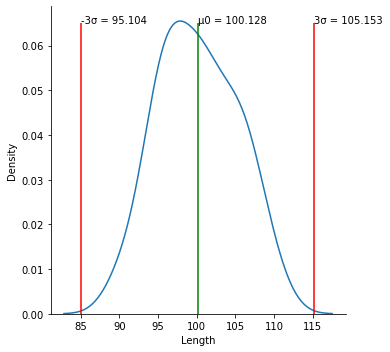

In [82]:
sns.displot(data=sampledata['Length'], kind = 'kde')
plt.vlines(x = 100.128, ymax= 0.065, ymin=0, colors='green')
plt.vlines(x = pop_mean - 3 * pop_std, ymax= 0.065, ymin=0, colors='red')
plt.vlines(x = pop_mean + 3 * pop_std, ymax= 0.065, ymin=0, colors='red')
plt.text(x=pop_mean, y=0.065, s='µ0 = 100.128')
plt.text(x= (pop_mean - 3 * pop_std), y=0.065, s='-3σ = 95.104')
plt.text(x= (pop_mean + 3 * pop_std), y=0.065, s='3σ = 105.153')
plt.show()

In [19]:
sample = sampledata['Length'][0:50]

In [25]:
sample.head()

0    102.67
1    102.50
2     95.37
3     94.77
4    104.26
Name: Length, dtype: float64

In [20]:
sample_head = sample              # taking sample more than 30 by slicing to apply Z statistics
sample_head_avg = np.mean(sample_head)   # taking average of the sample

In [21]:
conf_int = []                            # creating variable to store confidence interval

In [23]:
for i in sample_head:
    z_statistic = stats.norm.pdf(0.025)  #  using probability density function since it is two sided testing
    stand_error = pop_std / math.sqrt(len(sample_head))
    marg_error = z_statistic * stand_error
    interval = (sample_head_avg - marg_error, sample_head_avg + marg_error) # finding confidence interval
    conf_int.append(interval)

###  Visualizing Confidence Interval Distribution

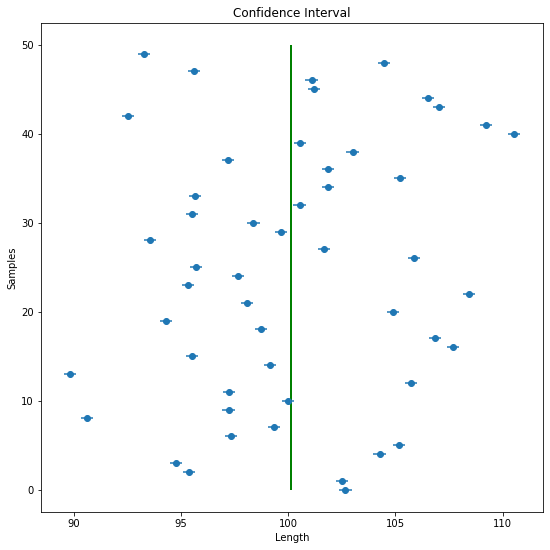

In [24]:
plt.figure(figsize=(9,9))

plt.errorbar(y = np.arange(0,50,1),
             x = sample_head,
             xerr=[(top - bot)/2 for top, bot in conf_int],
             fmt = 'o')

plt.vlines(x = 100.128,
           ymax= 50,
           ymin = 0,
           colors= 'green',
           linewidth = 2.0)

plt.xlabel('Length')
plt.ylabel('Samples')
plt.title('Confidence Interval')
plt.show()

In [22]:
for i in range(500):
    random_select = np.random.choice(sampledata['Length'], size=100)
    random_mean = random_select.mean()
    sample.append(random_mean)

### Hypothesis

Ho: sample mean = population mean
Ha: sample mean != population mean

### Distribution of the sample

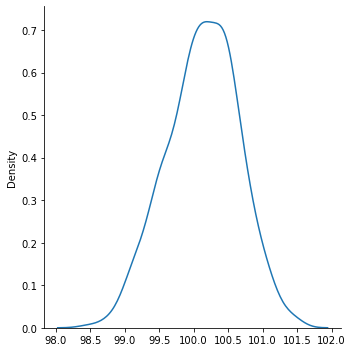

In [23]:
sns.displot(x=sample, kind='kde')
plt.show()

In [24]:
zteststats = weightstats.ztest(x1=sample, value=pop_mean, alternative='two-sided')

In [25]:
zteststats           # z statistical value in 0.016 and p value is 0.98

(0.01666526557103562, 0.9867036573699653)

In [31]:
stats.norm.isf(0.025)   # calculating positive critical value

1.9599639845400545

In [32]:
stats.norm.ppf(0.025)   # calculating negative critical value

-1.9599639845400545

In [34]:
xax = np.linspace(-3, 3)
yax = stats.norm.pdf(xax)

### Critical and Test statistics distribution

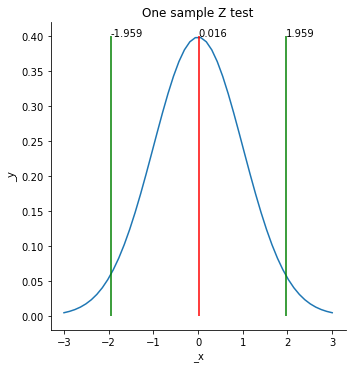

In [46]:
sns.relplot(x=xax, y=yax, kind='line')
plt.vlines(x=-1.959, ymax=0.40, ymin = 0, colors='green')
plt.vlines(x=1.959, ymax=0.40, ymin = 0, colors='green')
plt.vlines(x=0.016, ymax=0.40, ymin = 0, colors='red')
plt.text(x=-1.959, y=0.40, s='-1.959')
plt.text(x=1.959, y=0.40, s='1.959')
plt.text(x=0.016, y=0.40, s='0.016')
plt.title('One sample Z test')
plt.show()

In [ ]:
# As the z statistical value 0.016 therefore we failed to reject null hypothesis
# therefore the sample mean is same as the population mean of 'Length'